In [12]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [13]:
insurance_df = pd.read_csv(r"C:\Users\dnsim\OneDrive\Documents\Finance\auto_insurance_sweden.csv")
insurance_df.head()

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [14]:
insurance_df.shape

(63, 2)

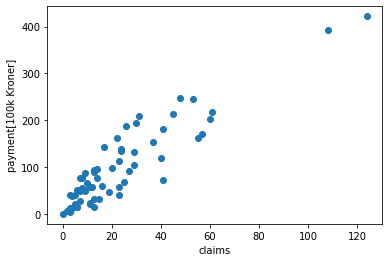

In [19]:
plot.scatter(insurance_df.claims, insurance_df.payment)
plot.xlabel('claims')
plot.ylabel('payment[100k Kroner]')
plot.show()

In [16]:
y_insurance = insurance_df.payment
x_insurance = stats.add_constant(insurance_df['claims'])

In [20]:
model_insurance =stats.OLS(y_insurance, x_insurance)
results_insurance = model_insurance.fit()

In [22]:
print(results_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                payment   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.05e-25
Time:                        08:29:11   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

In [29]:
intercept_insurance = results_insurance.params[0]
claims_coeff=results_insurance.params[1]
ssr_insurance = results_insurance.ssr

In [ ]:
#plotting results

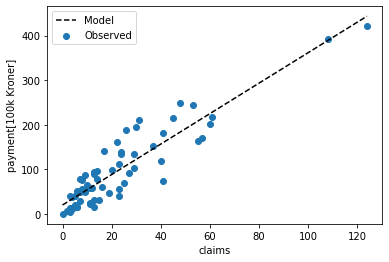

In [31]:
#prep training obs.

plot.scatter(insurance_df.claims, insurance_df.payment, label='Observed')

#prep line of best fit
x_synthetic =np.linspace(0,insurance_df.claims.max(),50)
y_pred_insurance= claims_coeff*x_synthetic+intercept_insurance
plot.plot(x_synthetic, y_pred_insurance, color='k', ls='--', label='Model')

#plot combined chart
plot.xlabel('claims')
plot.ylabel('payment[100k Kroner]')
plot.legend()
plot.show()